In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model

In [2]:
mod_u = load_model('/kaggle/input/unet428/unet_model.h5')

In [3]:
mod_b = load_model('/kaggle/input/428-bifpn-segment/unet_with_BiFPN.h5')

In [4]:
# Function to preprocess unseen images
def preprocess_unseen_image(image_path, img_height, img_width):
  img = load_img(image_path, target_size=(img_height, img_width))
  img_array = img_to_array(img) / 255.0  # Normalize image
  return np.expand_dims(img_array, axis=0)  # Add batch dimension

# Function to predict segmentation mask for an unseen image
def predict_unseen_image(model, image_path, img_height, img_width):
  image = preprocess_unseen_image(image_path, img_height, img_width)
  prediction = model.predict(image)
  return image.squeeze(), prediction.squeeze()

# Function to visualize predictions with side-by-side comparison
def visualize_comparison(image, prediction_unet, prediction_bifpn):
  plt.figure(figsize=(15, 6))

  plt.subplot(1, 3, 1)
  plt.title("Unseen Image")
  plt.imshow(image)

  plt.subplot(1, 3, 2)
  plt.title("Predicted Mask by UNet")
  plt.imshow(prediction_unet, cmap='gray')

  plt.subplot(1, 3, 3)
  plt.title("Predicted Mask by UNet with BiFPN")
  plt.imshow(prediction_bifpn, cmap='gray')

  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step


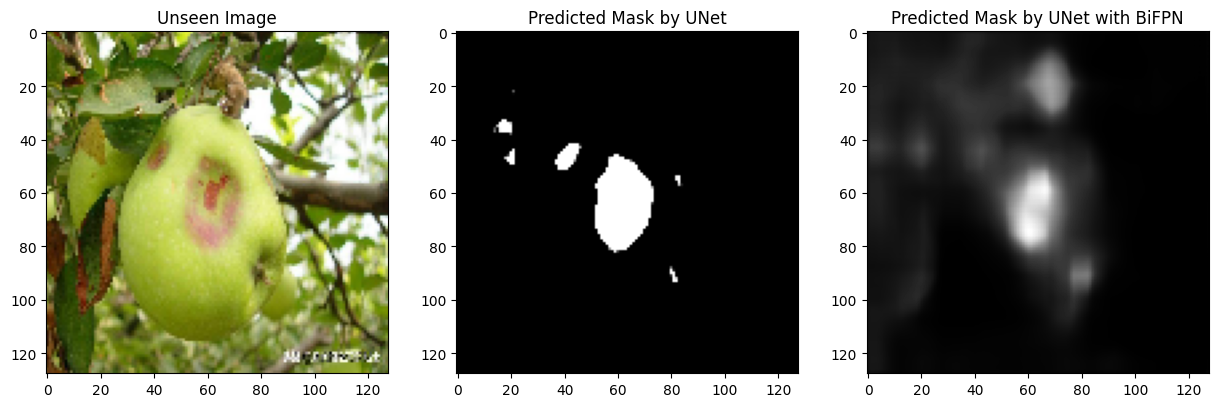

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


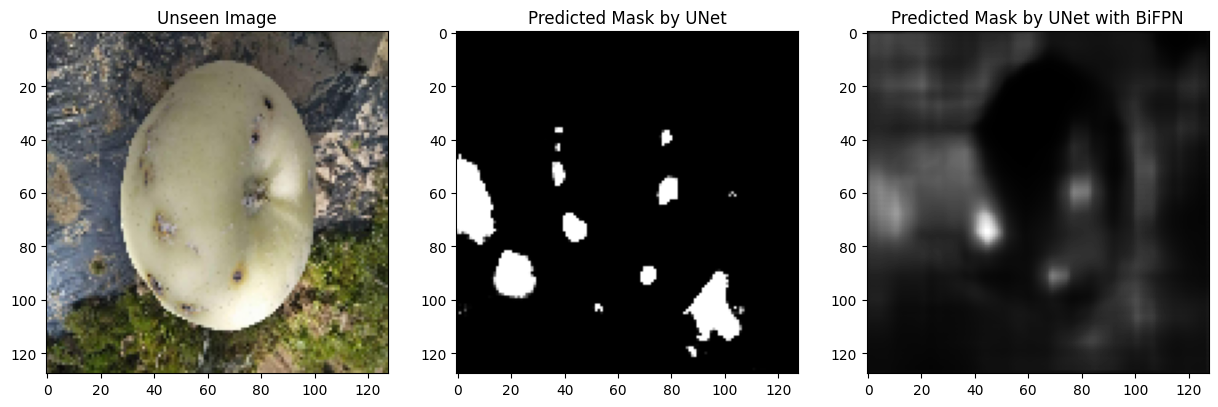

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


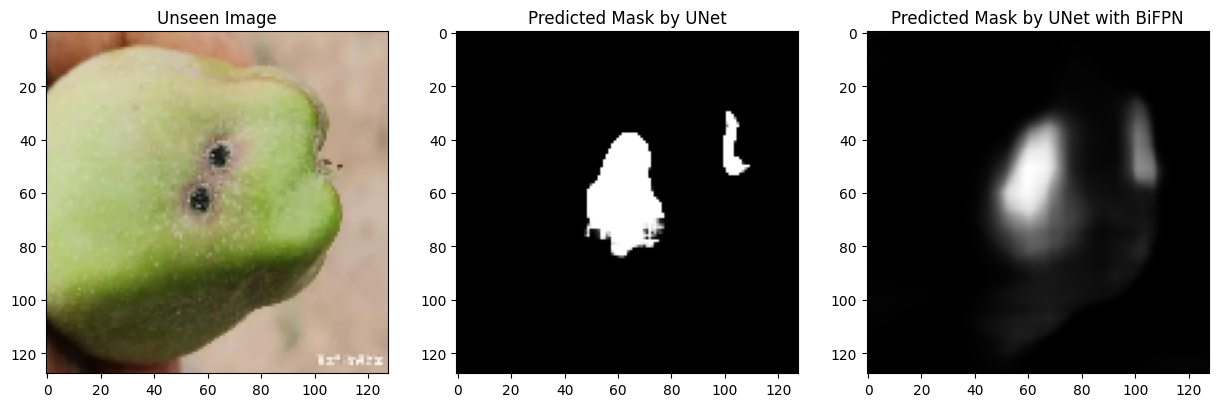

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


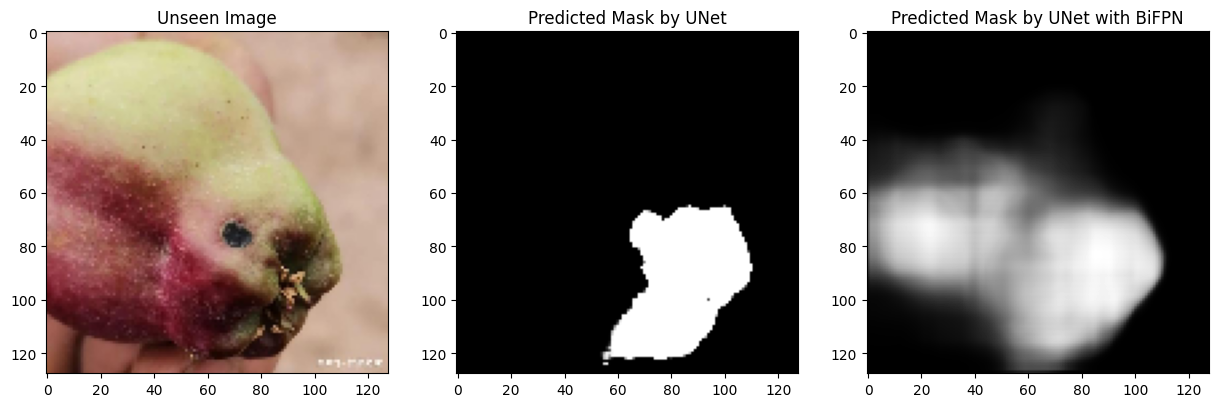

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


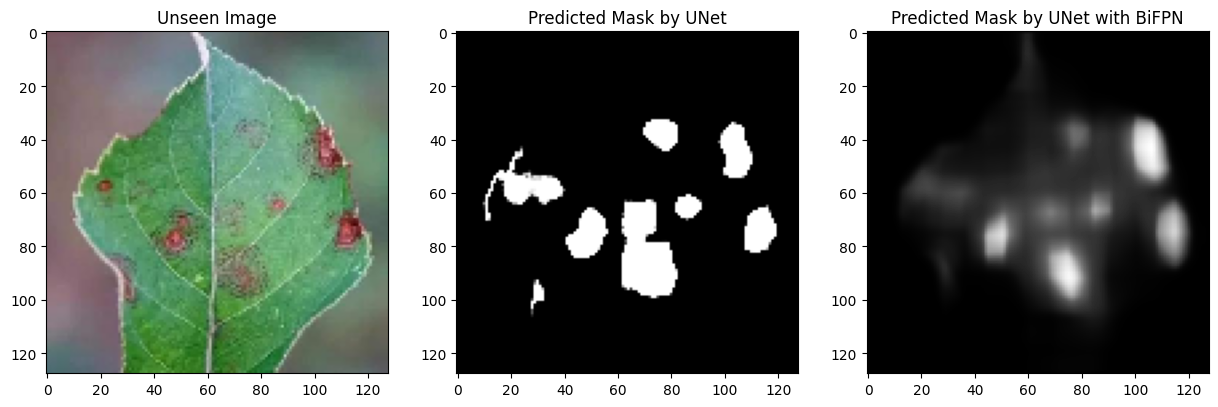

In [5]:
# Folder containing unseen images
UNSEEN_IMAGE_FOLDER = "/kaggle/input/leaf-images/Unseen Images"

# Iterate through unseen images
for image_name in os.listdir(UNSEEN_IMAGE_FOLDER):
  image_path = os.path.join(UNSEEN_IMAGE_FOLDER, image_name)
  unseen_image, unseen_prediction_unet = predict_unseen_image(
      mod_u, image_path, 128, 128)
  unseen_prediction_bifpn = predict_unseen_image(
      mod_b, image_path, 128, 128)[1]

  visualize_comparison(unseen_image, unseen_prediction_unet, unseen_prediction_bifpn)